In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import keras
import librosa
from librosa import display
%matplotlib inline

In [40]:
import math
def calculateAngle(x1,y1,x2,y2,x3,y3):
 
    # Calculate the angle between the three points
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    
    if angle<0:
        angle += 360
    
    return angle

In [41]:
!pip install -q mediapipe

In [42]:
import mediapipe as mp

mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

def add_angle_feature(df):
    # Define arrays to store the angles
    left_elbow_angles = np.zeros((len(df),))
    right_elbow_angles = np.zeros((len(df),))
    left_shoulder_angles = np.zeros((len(df),))
    right_shoulder_angles = np.zeros((len(df),))
    left_hip_angles = np.zeros((len(df),))
    right_hip_angles = np.zeros((len(df),))
    left_knee_angles = np.zeros((len(df),))
    right_knee_angles = np.zeros((len(df),))

    # Loop through the rows and calculate the angles
    for i in range(len(df)):

        # Calculate left elbow angle
        left_elbow_angles[i] = calculateAngle(df.LEFT_SHOULDER_x[i], 
                                              df.LEFT_SHOULDER_y[i],
                                              df.LEFT_ELBOW_x[i], 
                                              df.LEFT_ELBOW_y[i],
                                              df.LEFT_WRIST_x[i], 
                                              df.LEFT_WRIST_y[i])

        # Calculate right elbow angle
        right_elbow_angles[i] = calculateAngle(df.RIGHT_SHOULDER_x[i], 
                                               df.RIGHT_SHOULDER_y[i],
                                               df.RIGHT_ELBOW_x[i], 
                                               df.RIGHT_ELBOW_y[i],
                                               df.RIGHT_WRIST_x[i], 
                                               df.RIGHT_WRIST_y[i])

        # Calculate left shoulder angle
        left_shoulder_angles[i] = calculateAngle(df.LEFT_HIP_x[i], 
                                                 df.LEFT_HIP_y[i],
                                                 df.LEFT_SHOULDER_x[i], 
                                                 df.LEFT_SHOULDER_y[i],
                                                 df.LEFT_ELBOW_x[i], 
                                                 df.LEFT_ELBOW_y[i])

        # Calculate right shoulder angle
        right_shoulder_angles[i] = calculateAngle(df.RIGHT_HIP_x[i], 
                                                  df.RIGHT_HIP_y[i],
                                                  df.RIGHT_SHOULDER_x[i], 
                                                  df.RIGHT_SHOULDER_y[i],
                                                  df.RIGHT_ELBOW_x[i], 
                                                  df.RIGHT_ELBOW_y[i])

        # Calculate left hip angle
        left_hip_angles[i] = calculateAngle(df.LEFT_SHOULDER_x[i], 
                                            df.LEFT_SHOULDER_y[i],
                                            df.LEFT_HIP_x[i], 
                                            df.LEFT_HIP_y[i],
                                            df.LEFT_KNEE_x[i], 
                                            df.LEFT_KNEE_y[i])

        # Calculate right hip angle
        right_hip_angles[i] = calculateAngle(df.RIGHT_SHOULDER_x[i], 
                                             df.RIGHT_SHOULDER_y[i],
                                             df.RIGHT_HIP_x[i], 
                                             df.RIGHT_HIP_y[i],
                                             df.RIGHT_KNEE_x[i], 
                                             df.RIGHT_KNEE_y[i])

        # Calculate left knee angle
        left_knee_angles[i] = calculateAngle(df.LEFT_HIP_x[i], 
                                             df.LEFT_HIP_y[i],
                                             df.LEFT_KNEE_x[i], 
                                             df.LEFT_KNEE_y[i],
                                             df.LEFT_ANKLE_x[i], 
                                             df.LEFT_ANKLE_y[i])

        # Calculate right knee angle
        right_knee_angles[i] = calculateAngle(df.RIGHT_HIP_x[i], 
                                              df.RIGHT_HIP_y[i],
                                              df.RIGHT_KNEE_x[i], 
                                              df.RIGHT_KNEE_y[i],
                                              df.RIGHT_ANKLE_x[i], 
                                              df.RIGHT_ANKLE_y[i])
    df['left_elbow_angle'] = left_elbow_angles
    df['right_elbow_angle'] = right_elbow_angles
    df['left_shoulder_angle'] = left_shoulder_angles
    df['right_shoulder_angle'] = right_shoulder_angles
    df['left_hip_angle'] = left_hip_angles
    df['right_hip_angle'] = right_hip_angles
    df['left_knee_angle'] = left_knee_angles
    df['right_knee_angle'] = right_knee_angles

    return df

In [43]:
train = pd.read_csv("/content/drive/MyDrive/UGP23/dataset/Yoga_82_modified/yoga_82/train_keypoints_yoga82.csv")

In [44]:
# left_elbow_angles of 1st row
calculateAngle(train.LEFT_SHOULDER_x[0],
               train.LEFT_SHOULDER_y[0],
               train.LEFT_ELBOW_x[0],
               train.LEFT_ELBOW_y[0],
               train.LEFT_WRIST_x[0],
               train.LEFT_WRIST_y[0],
               )

79.58818594849835

In [45]:
train = add_angle_feature(train)
train

,file_name,labels,NOSE_x,NOSE_y,NOSE_score,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_score,LEFT_EYE_x,LEFT_EYE_y,...,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_score,left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_hip_angle,right_hip_angle,left_knee_angle,right_knee_angle
0,631.jpg,5,0.692113,0.597546,0.998951,0.704426,0.605220,0.998914,0.706371,0.602952,...,0.597948,0.972374,79.588186,56.179817,285.263721,288.782246,72.917352,68.186869,301.697910,302.790281
1,1_12.jpg,4,0.315723,0.292811,0.999945,0.323114,0.264584,0.999853,0.325839,0.264922,...,0.807028,0.892986,187.292986,185.674594,61.428676,60.346734,248.643596,250.424146,80.064990,76.665754
2,189.jpg,3,0.569304,0.255873,1.000000,0.571277,0.241736,1.000000,0.575188,0.241371,...,0.744183,0.999627,179.187971,171.981247,75.820600,273.960310,214.576236,134.943301,184.964031,218.753930
3,2_400.jpg,4,0.805867,0.212494,0.999709,0.781934,0.197481,0.998244,0.778692,0.200673,...,0.902261,0.999369,175.364693,171.272051,297.058820,297.335670,113.860182,110.315821,267.071545,271.659420
4,216.jpg,7,0.489411,0.177114,0.999858,0.496048,0.160088,0.999776,0.501392,0.160482,...,0.928743,0.821828,328.495242,39.799935,353.786899,18.808341,124.090971,183.730097,322.191657,184.611325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,89.jpg,2,0.525786,0.137871,1.000000,0.522916,0.124028,1.000000,0.523098,0.123896,...,0.204772,0.999346,169.199016,189.571555,242.994843,99.832748,173.126097,309.480163,180.672061,186.877530
1498,1_122.jpg,1,0.414844,0.212979,0.999174,0.399074,0.208266,0.999027,0.397074,0.210901,...,0.850410,0.945645,164.237805,162.556291,159.884158,159.767588,231.524579,103.222736,186.351321,275.516546
1499,274.jpg,8,0.408738,0.684995,0.989426,0.384826,0.691994,0.981414,0.382036,0.688628,...,0.765644,0.026248,196.828618,197.519170,174.501520,173.744721,300.228057,296.115081,181.315225,186.560127
1500,29.jpg,5,0.287048,0.326413,0.996459,0.279381,0.322492,0.993156,0.278479,0.326426,...,0.593082,0.538932,178.369204,186.063438,348.402786,28.504035,225.629117,185.456912,317.929158,185.914284


In [46]:
train.labels.value_counts()

6    274
4    240
8    189
3    162
5    158
7    135
2    123
1    111
0    110
Name: labels, dtype: int64

In [47]:
x_train = train.drop(['file_name', 'labels'], axis=1)
y_train = train.labels

In [48]:
x_train = x_train.iloc[:, -8:]  ##take angles only
x_train

,left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_hip_angle,right_hip_angle,left_knee_angle,right_knee_angle
0,79.588186,56.179817,285.263721,288.782246,72.917352,68.186869,301.697910,302.790281
1,187.292986,185.674594,61.428676,60.346734,248.643596,250.424146,80.064990,76.665754
2,179.187971,171.981247,75.820600,273.960310,214.576236,134.943301,184.964031,218.753930
3,175.364693,171.272051,297.058820,297.335670,113.860182,110.315821,267.071545,271.659420
4,328.495242,39.799935,353.786899,18.808341,124.090971,183.730097,322.191657,184.611325
...,...,...,...,...,...,...,...,...
1497,169.199016,189.571555,242.994843,99.832748,173.126097,309.480163,180.672061,186.877530
1498,164.237805,162.556291,159.884158,159.767588,231.524579,103.222736,186.351321,275.516546
1499,196.828618,197.519170,174.501520,173.744721,300.228057,296.115081,181.315225,186.560127
1500,178.369204,186.063438,348.402786,28.504035,225.629117,185.456912,317.929158,185.914284


In [49]:
y_train = y_train.astype('float64')

In [50]:
y_train = keras.utils.to_categorical(y_train)

In [51]:
test = pd.read_csv("/content/drive/MyDrive/UGP23/dataset/Yoga_82_modified/yoga_82/test_keypoints_yoga82.csv")

In [52]:
test = add_angle_feature(test)

In [53]:
test.labels.value_counts()

6    69
4    60
8    47
5    40
3    40
7    34
2    31
0    28
1    27
Name: labels, dtype: int64

In [54]:
x_test = test.drop(['file_name', 'labels'], axis=1)
y_test = test.labels

In [55]:
x_test = x_test.iloc[:, -8:]  ##take angles only

In [56]:
y_test = test.labels.astype('float64')

In [57]:
y_test = keras.utils.to_categorical(y_test)

In [58]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dense,Dropout,Activation
from sklearn import metrics
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [59]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [60]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1201, 8)
(1201, 9)
(376, 8)
(376, 9)


In [61]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(8,)))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(9, activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1152      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               33024     
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 9)                

In [62]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
checkpoint_path = "/content/drive/MyDrive/UGP23/dataset/Yoga_82_modified/weights_yoga82_angles.best_ann.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')
earlystopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=100)

In [64]:
history = model.fit(x_train, y_train, epochs=300, batch_size = 32, validation_data=(x_val, y_val), callbacks=[checkpoint, earlystopping])

Epoch 1/300
36/38 [===========================>..] - ETA: 0s - loss: 24.0042 - accuracy: 0.1458
Epoch 1: val_accuracy improved from -inf to 0.19934, saving model to /content/drive/MyDrive/UGP23/dataset/Yoga_82_modified/weights_yoga82_angles.best_ann.hdf5
38/38 [==============================] - 2s 12ms/step - loss: 23.2098 - accuracy: 0.1449 - val_loss: 2.1734 - val_accuracy: 0.1993
Epoch 2/300
37/38 [============================>.] - ETA: 0s - loss: 3.0776 - accuracy: 0.1579
Epoch 2: val_accuracy did not improve from 0.19934
38/38 [==============================] - 0s 8ms/step - loss: 3.0694 - accuracy: 0.1582 - val_loss: 2.1917 - val_accuracy: 0.1628
Epoch 3/300
33/38 [=========================>....] - ETA: 0s - loss: 2.4732 - accuracy: 0.1591
Epoch 3: val_accuracy did not improve from 0.19934
38/38 [==============================] - 0s 6ms/step - loss: 2.4584 - accuracy: 0.1649 - val_loss: 2.1856 - val_accuracy: 0.1661
Epoch 4/300
33/38 [=========================>....] - ETA: 0s - l

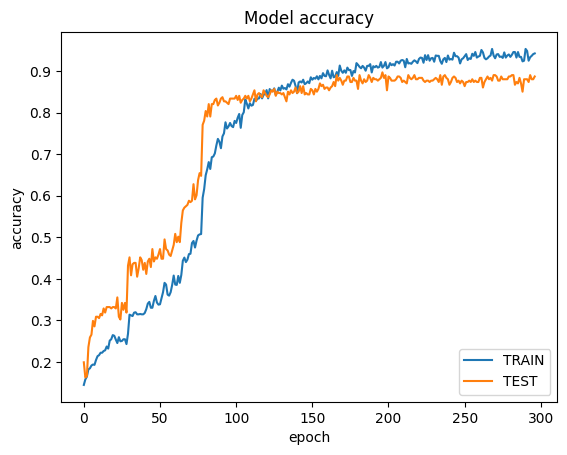

In [65]:
# Visualize the training history to see whether you're overfitting.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['TRAIN', 'TEST'], loc='lower right')
plt.show()

In [66]:
from keras.models import load_model

model = load_model("/content/drive/MyDrive/UGP23/dataset/Yoga_82_modified/weights_yoga82_angles.best_ann.hdf5")

In [67]:
model.evaluate(x_train, y_train)

38/38 [==============================] - 0s 2ms/step - loss: 0.1042 - accuracy: 0.9692


[0.10421647876501083, 0.9691923260688782]

In [68]:
model.evaluate(x_val, y_val)

10/10 [==============================] - 0s 2ms/step - loss: 0.8273 - accuracy: 0.8970


[0.8273060917854309, 0.8970099687576294]

In [69]:
model.evaluate(x_test, y_test)

12/12 [==============================] - 0s 2ms/step - loss: 0.5072 - accuracy: 0.9229


[0.5071864128112793, 0.9228723645210266]

In [70]:
y_pred = model.predict(x_test)

12/12 [==============================] - 0s 2ms/step


In [71]:
y_pred

array([[2.4613576e-06, 1.2698591e-10, 9.0547765e-09, ..., 5.9405359e-08,
        2.9209710e-09, 4.6986986e-07],
       [8.1530315e-01, 9.9679091e-05, 7.0164511e-05, ..., 7.5281742e-03,
        6.0189882e-04, 1.6852392e-01],
       [4.5969145e-10, 2.0527049e-18, 1.6051758e-09, ..., 9.9771172e-01,
        2.4892364e-07, 1.5730033e-09],
       ...,
       [2.4008230e-16, 1.3031569e-14, 9.9999958e-01, ..., 1.2383575e-09,
        4.1619938e-08, 6.7779868e-16],
       [3.0442332e-10, 9.9999958e-01, 1.1361386e-08, ..., 1.4685829e-11,
        9.0086205e-09, 4.2128653e-10],
       [2.3566677e-09, 9.5697295e-08, 1.4487711e-02, ..., 1.1541520e-01,
        3.4541515e-01, 1.1256220e-03]], dtype=float32)

In [72]:
y_pred.shape

(376, 9)

In [73]:
y_pred[0]

array([2.4613576e-06, 1.2698591e-10, 9.0547765e-09, 1.0203210e-11,
       9.9996215e-01, 3.4698907e-05, 5.9405359e-08, 2.9209710e-09,
       4.6986986e-07], dtype=float32)

In [74]:
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([4, 0, 6, 0, 5, 4, 3, 7, 6, 3, 6, 6, 2, 3, 8, 0, 3, 3, 5, 6, 7, 6,
       2, 0, 6, 6, 4, 6, 3, 6, 5, 2, 6, 8, 4, 4, 3, 0, 5, 4, 2, 6, 4, 6,
       4, 0, 4, 2, 4, 2, 8, 2, 8, 6, 0, 6, 7, 5, 6, 5, 7, 8, 4, 4, 2, 3,
       5, 3, 2, 8, 7, 2, 6, 4, 3, 3, 3, 8, 2, 7, 8, 7, 2, 1, 8, 3, 7, 7,
       5, 6, 7, 5, 8, 4, 1, 7, 6, 5, 0, 5, 4, 4, 6, 0, 0, 4, 0, 8, 1, 6,
       6, 4, 2, 6, 4, 1, 8, 6, 5, 8, 2, 3, 2, 3, 4, 6, 7, 6, 3, 4, 6, 6,
       7, 1, 8, 8, 4, 2, 6, 7, 5, 6, 0, 8, 2, 2, 3, 0, 5, 8, 4, 5, 5, 8,
       8, 4, 8, 6, 6, 0, 0, 1, 2, 7, 0, 3, 8, 5, 7, 6, 0, 7, 8, 3, 4, 4,
       8, 7, 2, 6, 8, 2, 4, 5, 8, 4, 6, 0, 5, 4, 7, 6, 4, 5, 5, 8, 8, 6,
       6, 6, 3, 7, 7, 4, 3, 6, 8, 2, 6, 4, 0, 6, 2, 6, 8, 8, 8, 7, 0, 4,
       0, 8, 6, 6, 1, 6, 5, 5, 1, 6, 4, 4, 6, 0, 5, 5, 5, 2, 3, 6, 2, 8,
       8, 2, 8, 1, 2, 6, 3, 3, 2, 7, 6, 6, 3, 7, 8, 1, 6, 3, 0, 6, 2, 5,
       1, 6, 3, 4, 5, 8, 8, 5, 7, 0, 7, 6, 6, 8, 3, 7, 2, 4, 4, 7, 8, 6,
       4, 8, 1, 6, 7, 5, 2, 1, 6, 6, 3, 6, 1, 1, 0,

In [75]:
pose_test = [None] * y_test.size
pose_pred = [None] * y_pred.size

for i in range(len(y_test)):
    if(y_test[i]==0): pose_test[i] = 'Plank'           
    if(y_test[i]==1): pose_test[i] = 'Warrior_I'       
    if(y_test[i]==2): pose_test[i] = 'Standing_big_toe'     
    if(y_test[i]==3): pose_test[i] = 'Warrior_II'         
    if(y_test[i]==4): pose_test[i] = 'Cat_Cow'         
    if(y_test[i]==5): pose_test[i] = 'Child'            
    if(y_test[i]==6): pose_test[i] = 'Cobra'     
    if(y_test[i]==7): pose_test[i] = 'Tree'              
    if(y_test[i]==8): pose_test[i] = 'Downward-Facing_Dog'


for i in range(len(y_pred)):
    if(y_pred[i]==0): pose_pred[i] = 'Plank'                           
    if(y_pred[i]==1): pose_pred[i] = 'Warrior_I'                   
    if(y_pred[i]==2): pose_pred[i] = 'Standing_big_toe'     
    if(y_pred[i]==3): pose_pred[i] = 'Warrior_II'                      
    if(y_pred[i]==4): pose_pred[i] = 'Cat_Cow'                                              
    if(y_pred[i]==5): pose_pred[i] = 'Child'                                 
    if(y_pred[i]==6): pose_pred[i] = 'Cobra'                              
    if(y_pred[i]==7): pose_pred[i] = 'Tree'                                    
    if(y_pred[i]==8): pose_pred[i] = 'Downward-Facing_Dog'     

In [76]:
confusion_matrix(pose_test, pose_pred)

array([[54,  1,  3,  1,  0,  0,  1,  0,  0],
       [ 0, 37,  2,  1,  0,  0,  0,  0,  0],
       [ 0,  2, 62,  0,  0,  3,  1,  0,  1],
       [ 0,  1,  2, 44,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 28,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 29,  1,  0,  0],
       [ 0,  2,  0,  0,  0,  0, 32,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0, 24,  1],
       [ 0,  0,  1,  0,  0,  2,  0,  0, 37]])

In [77]:
! pip install -q scikit-plot

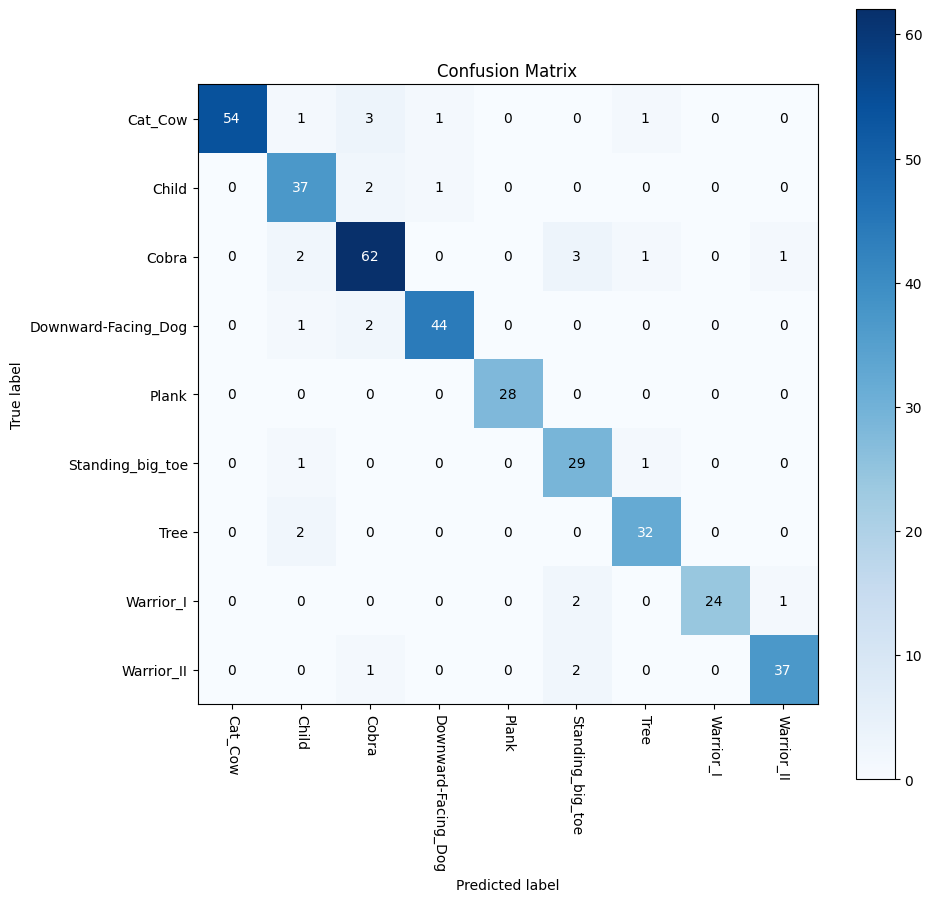

In [78]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(pose_test, pose_pred, figsize=(10,10))

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=270)
plt.show()

In [79]:
from sklearn.metrics import f1_score, precision_score, recall_score

f1_score(pose_test, pose_pred, average='weighted')

0.9238283179021218

In [80]:
precision_score(pose_test, pose_pred, average='weighted')

0.9274303870915805

In [81]:
recall_score(pose_test, pose_pred, average='weighted')

0.9228723404255319

In [82]:
from sklearn.metrics import f1_score

# Convert pose_val and pose_pred to numpy arrays
nppose_val = np.array(pose_test)
nppose_pred = np.array(pose_pred)

# Get a list of all unique labels
labels = np.unique(nppose_val)

# Calculate F1 score for each label
for label in labels:
    # Create a binary array indicating if the label matches the current label
    y_true = (nppose_val == label)
    y_pred = (nppose_pred == label)
    
    # Calculate F1 score
    f1 = f1_score(y_true, y_pred)
    
    # Print the F1 score for the current label
    print(f"F1 score for {label}: {f1}")


F1 score for Cat_Cow: 0.9473684210526316
F1 score for Child: 0.8809523809523809
F1 score for Cobra: 0.8920863309352518
F1 score for Downward-Facing_Dog: 0.9462365591397849
F1 score for Plank: 1.0
F1 score for Standing_big_toe: 0.8656716417910448
F1 score for Tree: 0.9275362318840579
F1 score for Warrior_I: 0.9411764705882353
F1 score for Warrior_II: 0.9367088607594937
